In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

<p style="font-family:courier;">1. We read the Accidents file and keep the latitude and longitude</p>

In [2]:
f = open('../Data/Accidents.csv', 'r')
cs = csv.reader(f)
cs.next()

data = []
rows = []

for row in cs:
    lon = float(row[-2])
    lat = float(row[-1])
    data.append([lon, lat])
    rows.append(row)

X = np.asarray(data)

<p style="font-family:courier;">2. We calculate the best K in k-means in a range between 50 and 70, and plot distortions and silhouette</p>

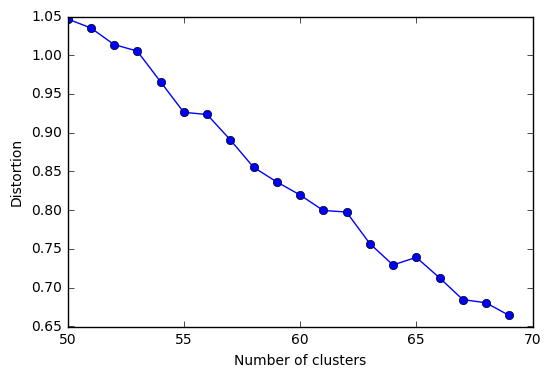

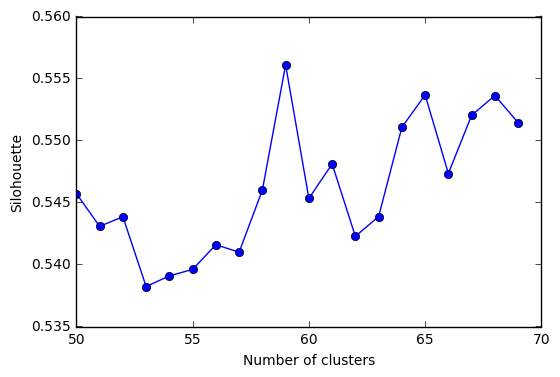

In [7]:
init = 'k-means++' 
iterations = 10 
max_iter = 300 
tol = 1e-04 

distortions = []
silhouettes = []

for i in range(50, 70):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol, n_jobs=-1)
    labels = km.fit_predict(X)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X, labels))
    
    
plt.plot(range(50,70), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


plt.plot(range(50,70), silhouettes , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silohouette')
plt.show()

<p style="font-family:courier;">3. We plot accidents using k-means with k=66</p>

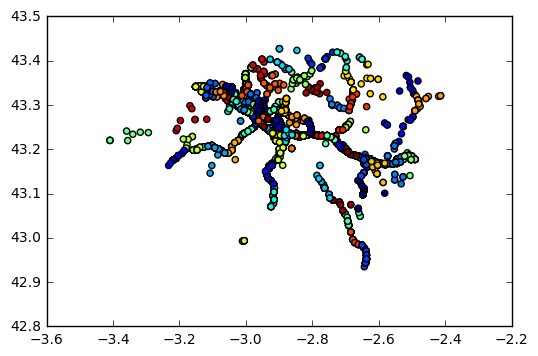

In [3]:
k = 66
init = 'k-means++' 
iterations = 10 
max_iter = 300 
tol = 1e-04

km = KMeans(k, n_init = iterations, max_iter= max_iter, tol=tol, init=init)
labels = km.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

<p style="font-family:courier;">4. We write new data with zones in a csv file called Accidents_zones_kmeans</p>

In [4]:
headers = ['causa', 'poblacion','fecha', 'hora', 'nivel', 'carretera', 
           'pk_inicial', 'pk_final', 'sentido', 'longitud', 'latitud',
          'zona']
with open('../Data/Accidents_zones_kmeans.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(headers)
    for i in range(len(labels)):
        writer.writerow(rows[i]+[labels[i]])

<p style="font-family:courier;">5. We apply spectral clustering with 66 clusters</p>

In [5]:
"""
spectral = SpectralClustering(n_clusters = 66, eigen_solver = 'arpack', 
                              affinity='nearest_neighbors', n_neighbors = 10, 
                              kernel_params = {'radius':0.095, 'metric':'euclidean','mode':'distance'}, 
                              n_init = 20)
"""
spectral = SpectralClustering(n_clusters =66, eigen_solver = 'arpack', affinity = 'nearest_neighbors', gamma=0.095)
labels = spectral.fit_predict(X)
unique_labels = set(labels)

/home/dolores/anaconda2/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<p style="font-family:courier;">6. We plot the results of spectral clustering</p>

/home/dolores/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


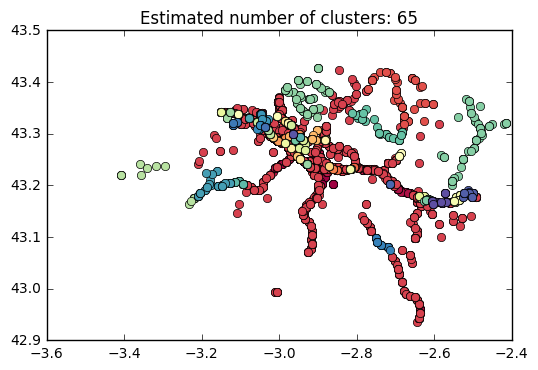

In [6]:
#Plot
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k != -1:
        class_member_mask = (labels == k)
        xy = X[labels == k]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markersize=6)
plt.title('Estimated number of clusters: %d' % k)
plt.show()